## Шаг 1: Установка DVC 
[link to the docs](https://dvc.org/doc/install)

**! DVC не заменяет Git**. DVC можно рассматривать как тул, который работает *поверх* гита. Убедитесь, что у вас уже стоит git 👀<br>
например,  командой ```$ git version```
*(и кликните [сюда](https://git-scm.com/downloads), если гита еще нет)*

In [3]:
! git version

git version 2.23.0


Установочные гайды DVC по ссылкам:
- [для macOS](https://dvc.org/doc/install/macos)
- [для Windows](https://dvc.org/doc/install/windows)
- [для Linux](https://dvc.org/doc/install/linux)

Проверить, что все установилось, можно командой ```$ dvc version```

In [2]:
! dvc version

git version 2.23.0
DVC version: 2.56.0 (osxpkg)
----------------------------
Platform: Python 3.10.11 on macOS-12.6.3-x86_64-i386-64bit
Subprojects:
	
Supports:
	azure (adlfs = 2023.4.0, knack = 0.10.1, azure-identity = 1.12.0),
	gdrive (pydrive2 = 1.15.3),
	gs (gcsfs = 2023.5.0),
	hdfs (fsspec = 2023.5.0, pyarrow = 12.0.0),
	http (aiohttp = 3.8.4, aiohttp-retry = 2.8.3),
	https (aiohttp = 3.8.4, aiohttp-retry = 2.8.3),
	oss (ossfs = 2021.8.0),
	s3 (s3fs = 2023.5.0, boto3 = 1.26.76),
	ssh (sshfs = 2023.4.1),
	webdav (webdav4 = 0.9.8),
	webdavs (webdav4 = 0.9.8),
	webhdfs (fsspec = 2023.5.0)
Config:
	Global: /Users/macbook/Library/Application Support/dvc
	System: /Library/Application Support/dvc


## Шаг 2: Создадим репозиторий

Сначала я создала папку DVC в которой хочу работать, и запустила две команды:

```$ git init``` и затем ```$ dvc init```

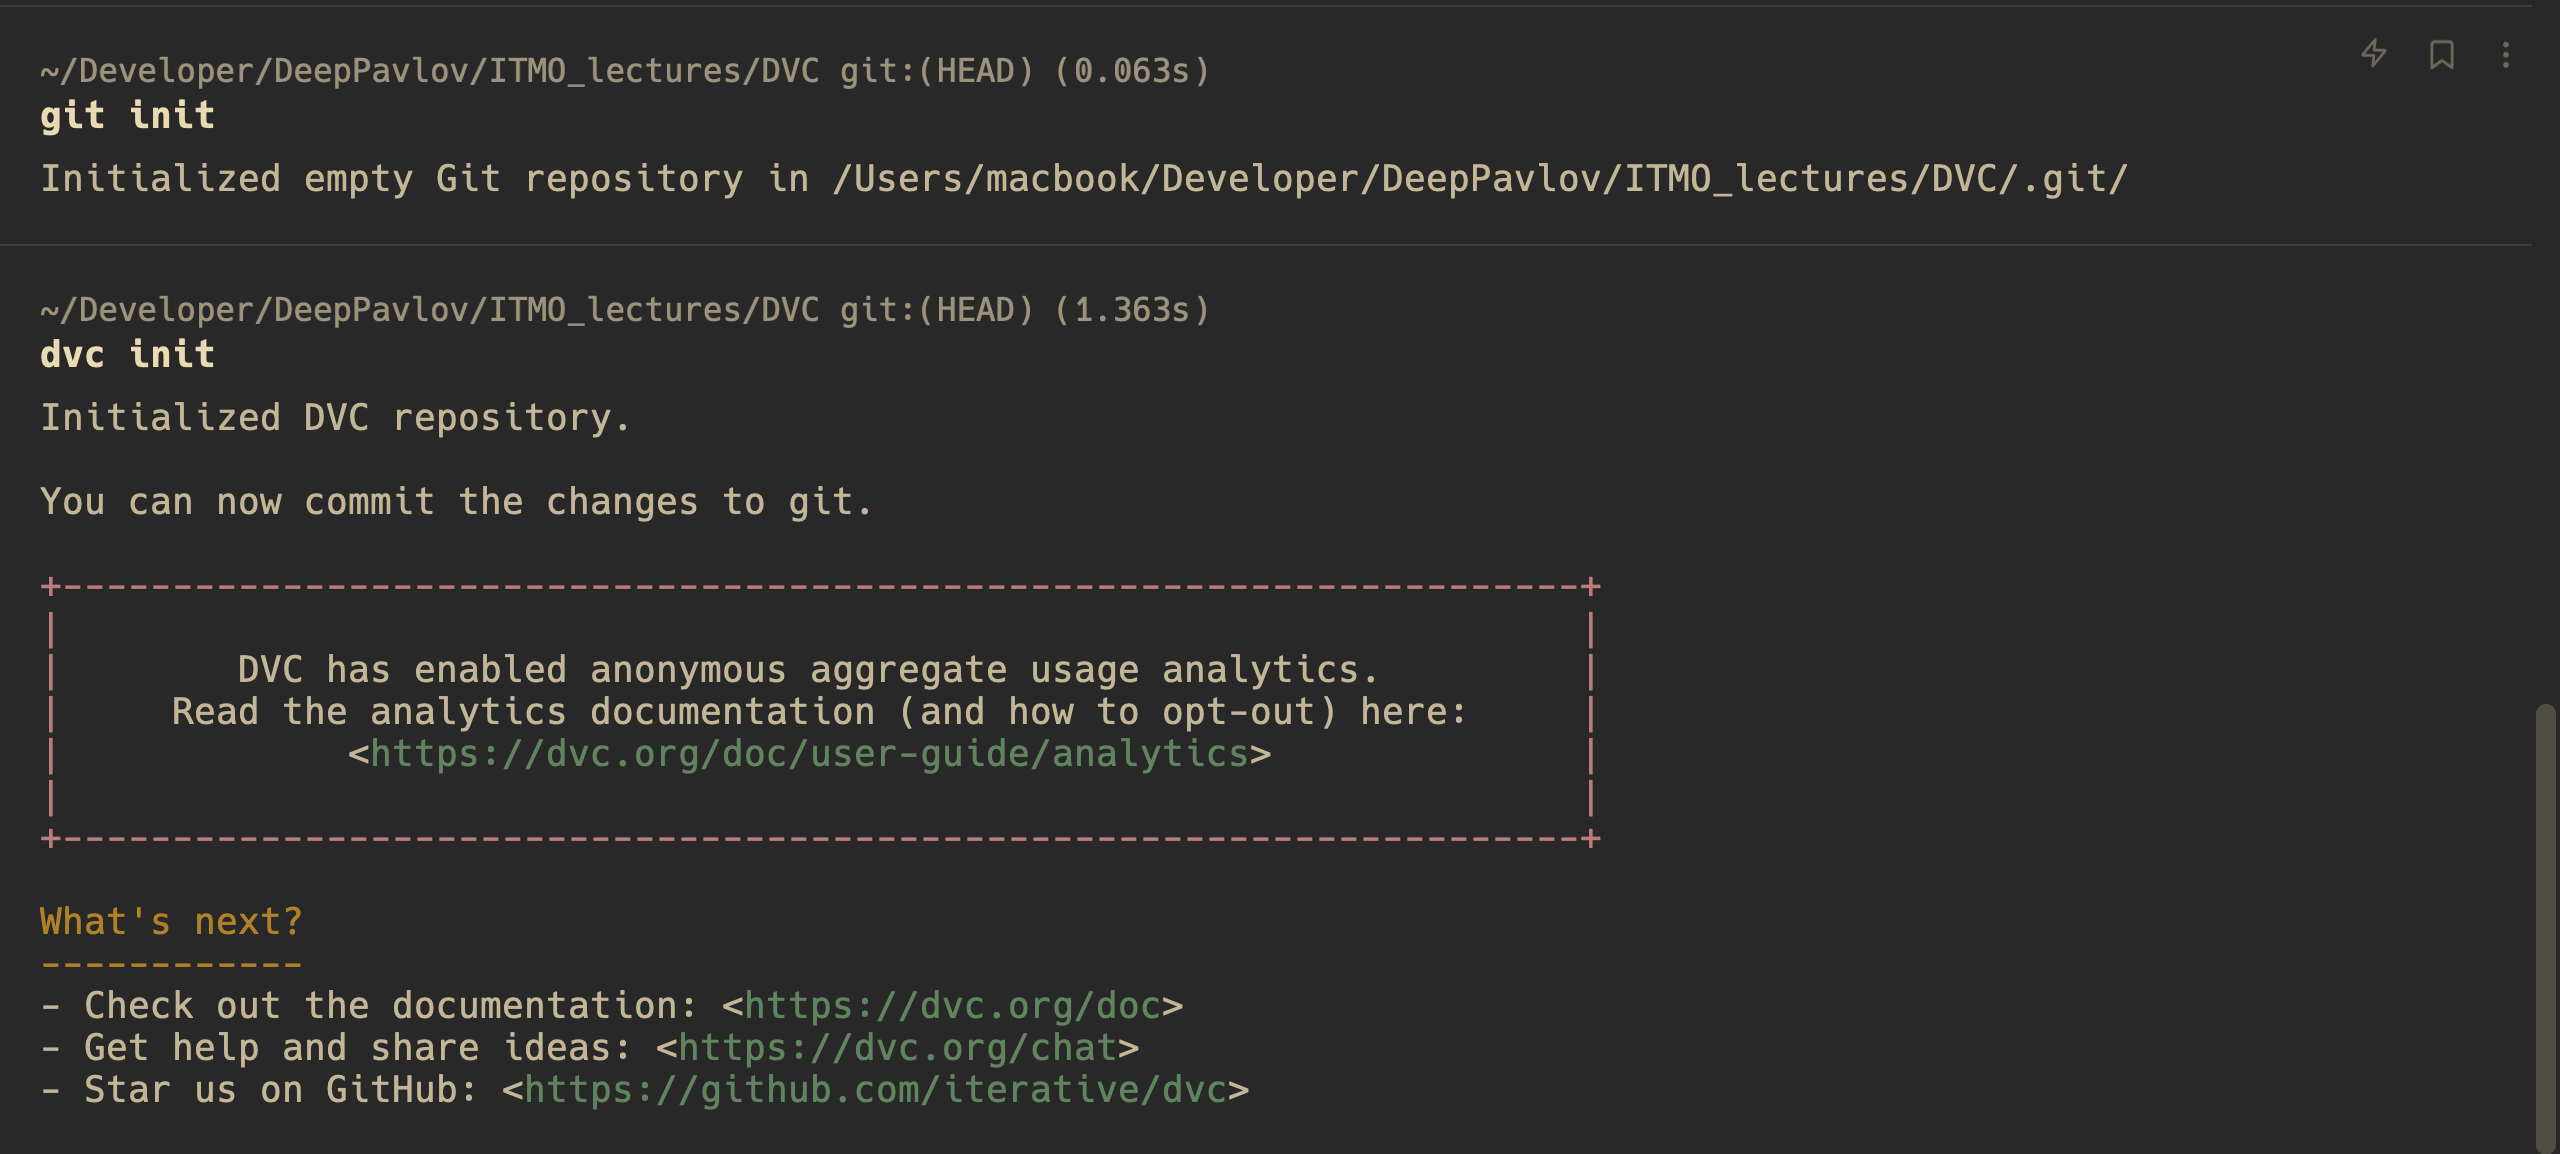

Теперь достанем датасет:  используем команду ```$ dvc get```,  она превратит репозиторий в "data registry". ```$ dvc get``` может достать любой файл из DVC-tracked репозитория

```
$ dvc get https://github.com/iterative/dataset-registry \
get-started/data.xml -o data/data.xml``` 

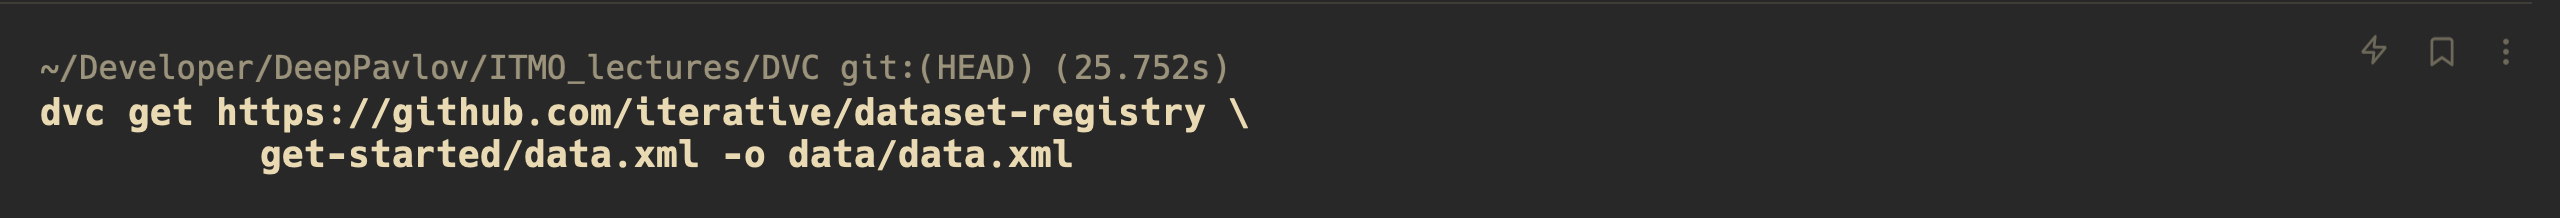

Теперь используем команду```$ dvc add``` чтобы начать трекать этот файл в DVC

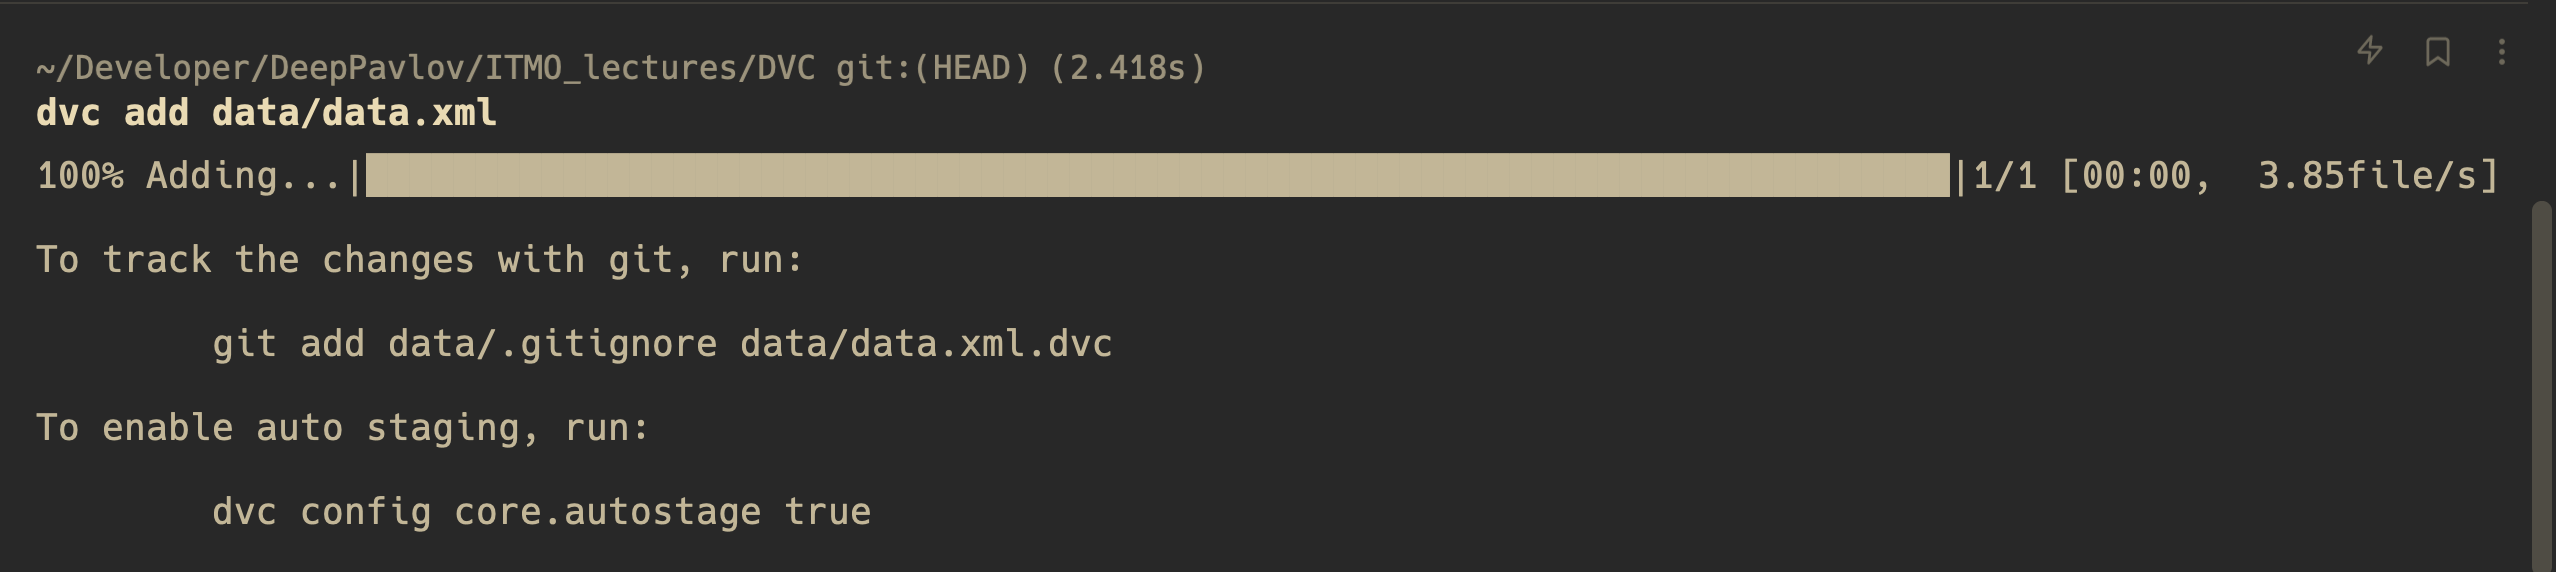

### А  как добавить локальные файлы?

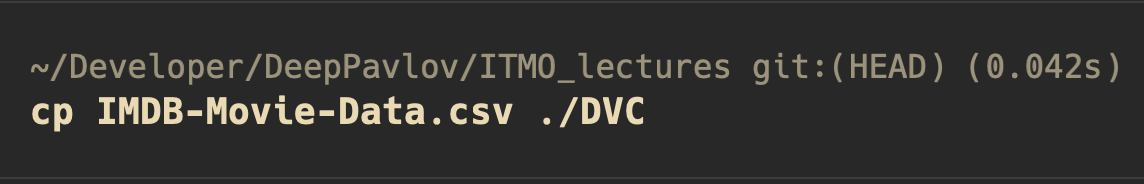

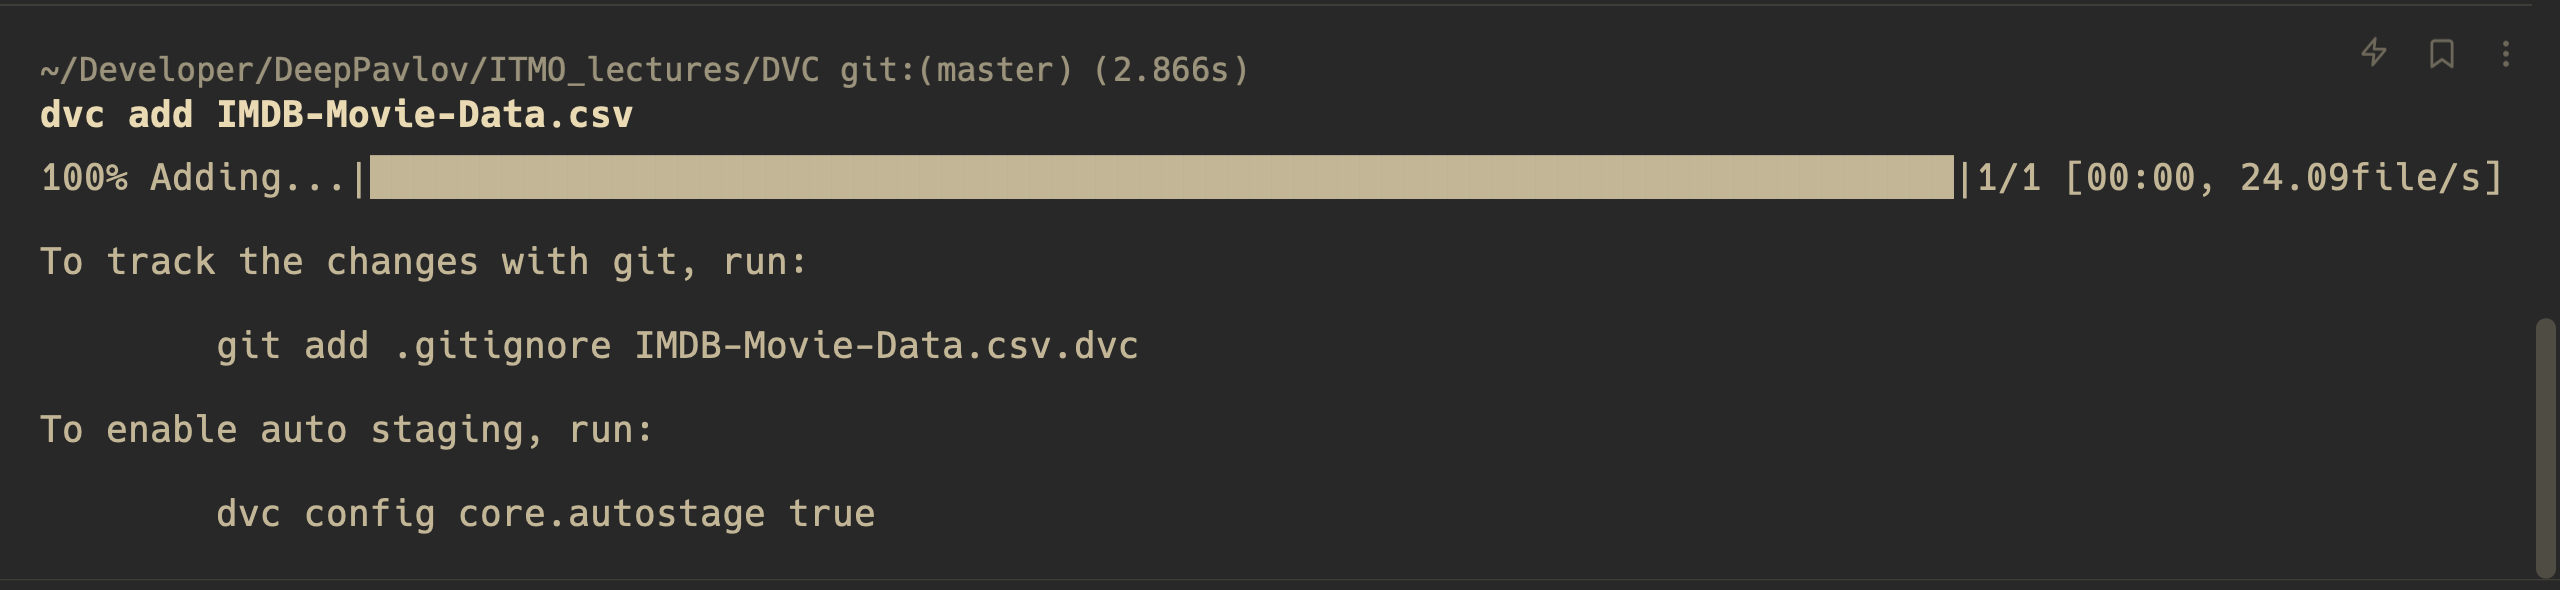

Теперь, исполним несколько гитовских команд, чтобы добавить изменения и в Git:

```
$ git add .
$ git commit -m "Add raw data" 
```

давайте с последним датасетом и поработаем

## Шаг 3 : Теперь данные можно хранить, версионировать и тд

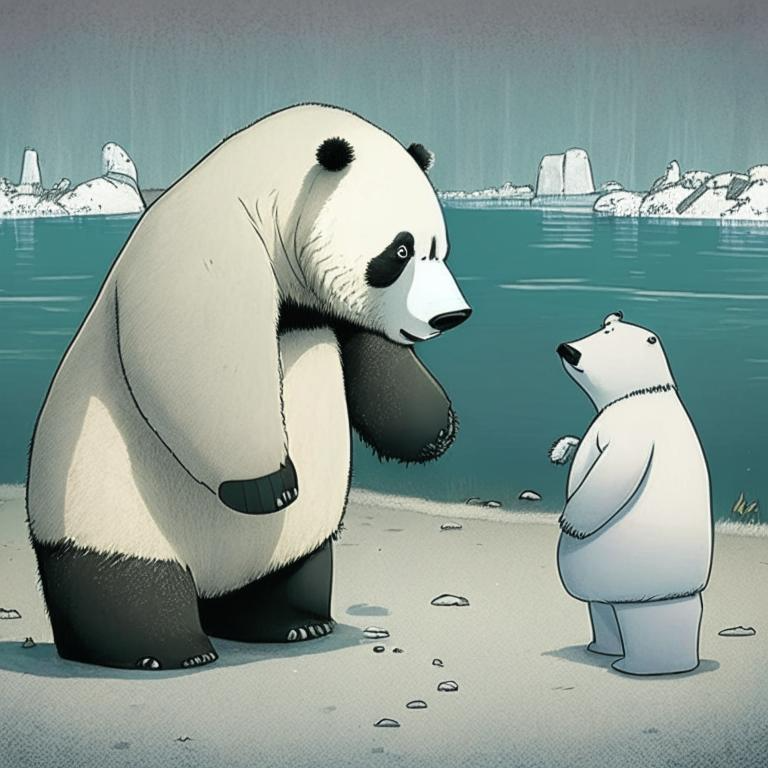


In [22]:
import pandas as pd
import polars as pl

### reading a df

In [25]:
df_pl = pl.read_csv('IMDB-Movie-Data.csv')

In [27]:
df_pd = pd.read_csv('IMDB-Movie-Data.csv')

In [28]:
df_pl.head(2)

Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
i64,str,str,str,str,str,i64,i64,f64,i64,f64,i64
1,"""Guardians of t…","""Action,Adventu…","""A group of int…","""James Gunn""","""Chris Pratt, V…",2014,121,8.1,757074,333.13,76
2,"""Prometheus""","""Adventure,Myst…","""Following clue…","""Ridley Scott""","""Noomi Rapace, …",2012,124,7.0,485820,126.46,65


In [29]:
df_pd.head(2)

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0


### Selecting cols

Select a single column by name
```df_pl['column_name']```

Select multiple columns by name
```df_pl[['column_name1', 'column_name2']]```

Select columns by index position
```df_pl[:, 1:3]```


А что еще попробуем?  
- filtering
- adding/removing
- aggregations